<a href="https://colab.research.google.com/github/yje0515/PythonStudy2025/blob/main/08_02_%ED%95%A9%EC%84%B1%EA%B3%B1%EC%8B%9C%EA%B0%81%ED%99%94.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# 합성곱 신경망의 시각화
# 합성곱층의 가중치와 특성맵을 시각화하여 신경망이 이미지에서 어떤 것을 학습하는지 알아보자

# 합성곱 신경망은 특히 이미지에 있는 특징을 찾아 압축하는데에 뛰어난 성능을 냄
# 합성곱층이 이미지에서 어떤 것을 학습했는지 알아보기 위해
# 합성곱층의 가중치와 특성맵을 그림으로 시각화 하려고 함
# 캐라스는 좀 더 복잡한 모델을 만들 수 있도록 함수형 API를 제공한다.
# 합성곱 신경망의 체크포인트 파일을 사용 (최적의 에포크까지 훈련한 모델 파라미터를 저장하고 있음)

# 가중치 시각화
# 합성곱 층은 여러개의 필터를 사용해 이미지에서 특징을 학습함
# 각 필터는 커널이라 불리는 가중치와 절편을 가지고 있다
# 일반적으로 절편은 시각적으로 의미가 없다
# 가중치는 입력이 이미지의 2차원 영역에 적용되어 어떤 특징을 크게 두드러지게 표현하는 역할
# 예를 들어 아래 그림과 같은 둥근 모서리가 있는 영역에서 크게 활성화되고
# 그렇지 않은 영역에서는 낮은 값을 만듦

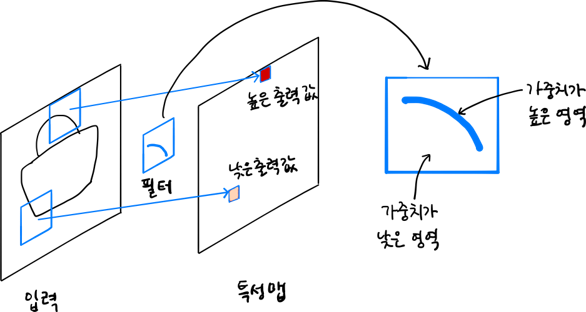

In [1]:
#  이 필터의 가운데 곡선 부분의 가중치 값은 높고 그 외부분의 가중치 값은 낮을 것임
# 이렇게 해야 둥근 모서리가 있는 입력과 곱해져서 큰 출력을 만듦

# 실행마다 동일한 결과를 얻기 위해 캐라스에 랜덤 시드를 사용하고
# 텐서플로 연산을 결정적으로 만든다
import tensorflow as tf
tf.keras.utils.set_random_seed(42)

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_3 (Conv2D)               │ (None, 28, 28, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 14, 14, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 14, 14, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 7, 7, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 3136)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 100)            │       313,700 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 100)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │         1,010 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,000,580 (3.82 MB)

 Trainable params: 333,526 (1.27 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 667,054 (2.54 MB)

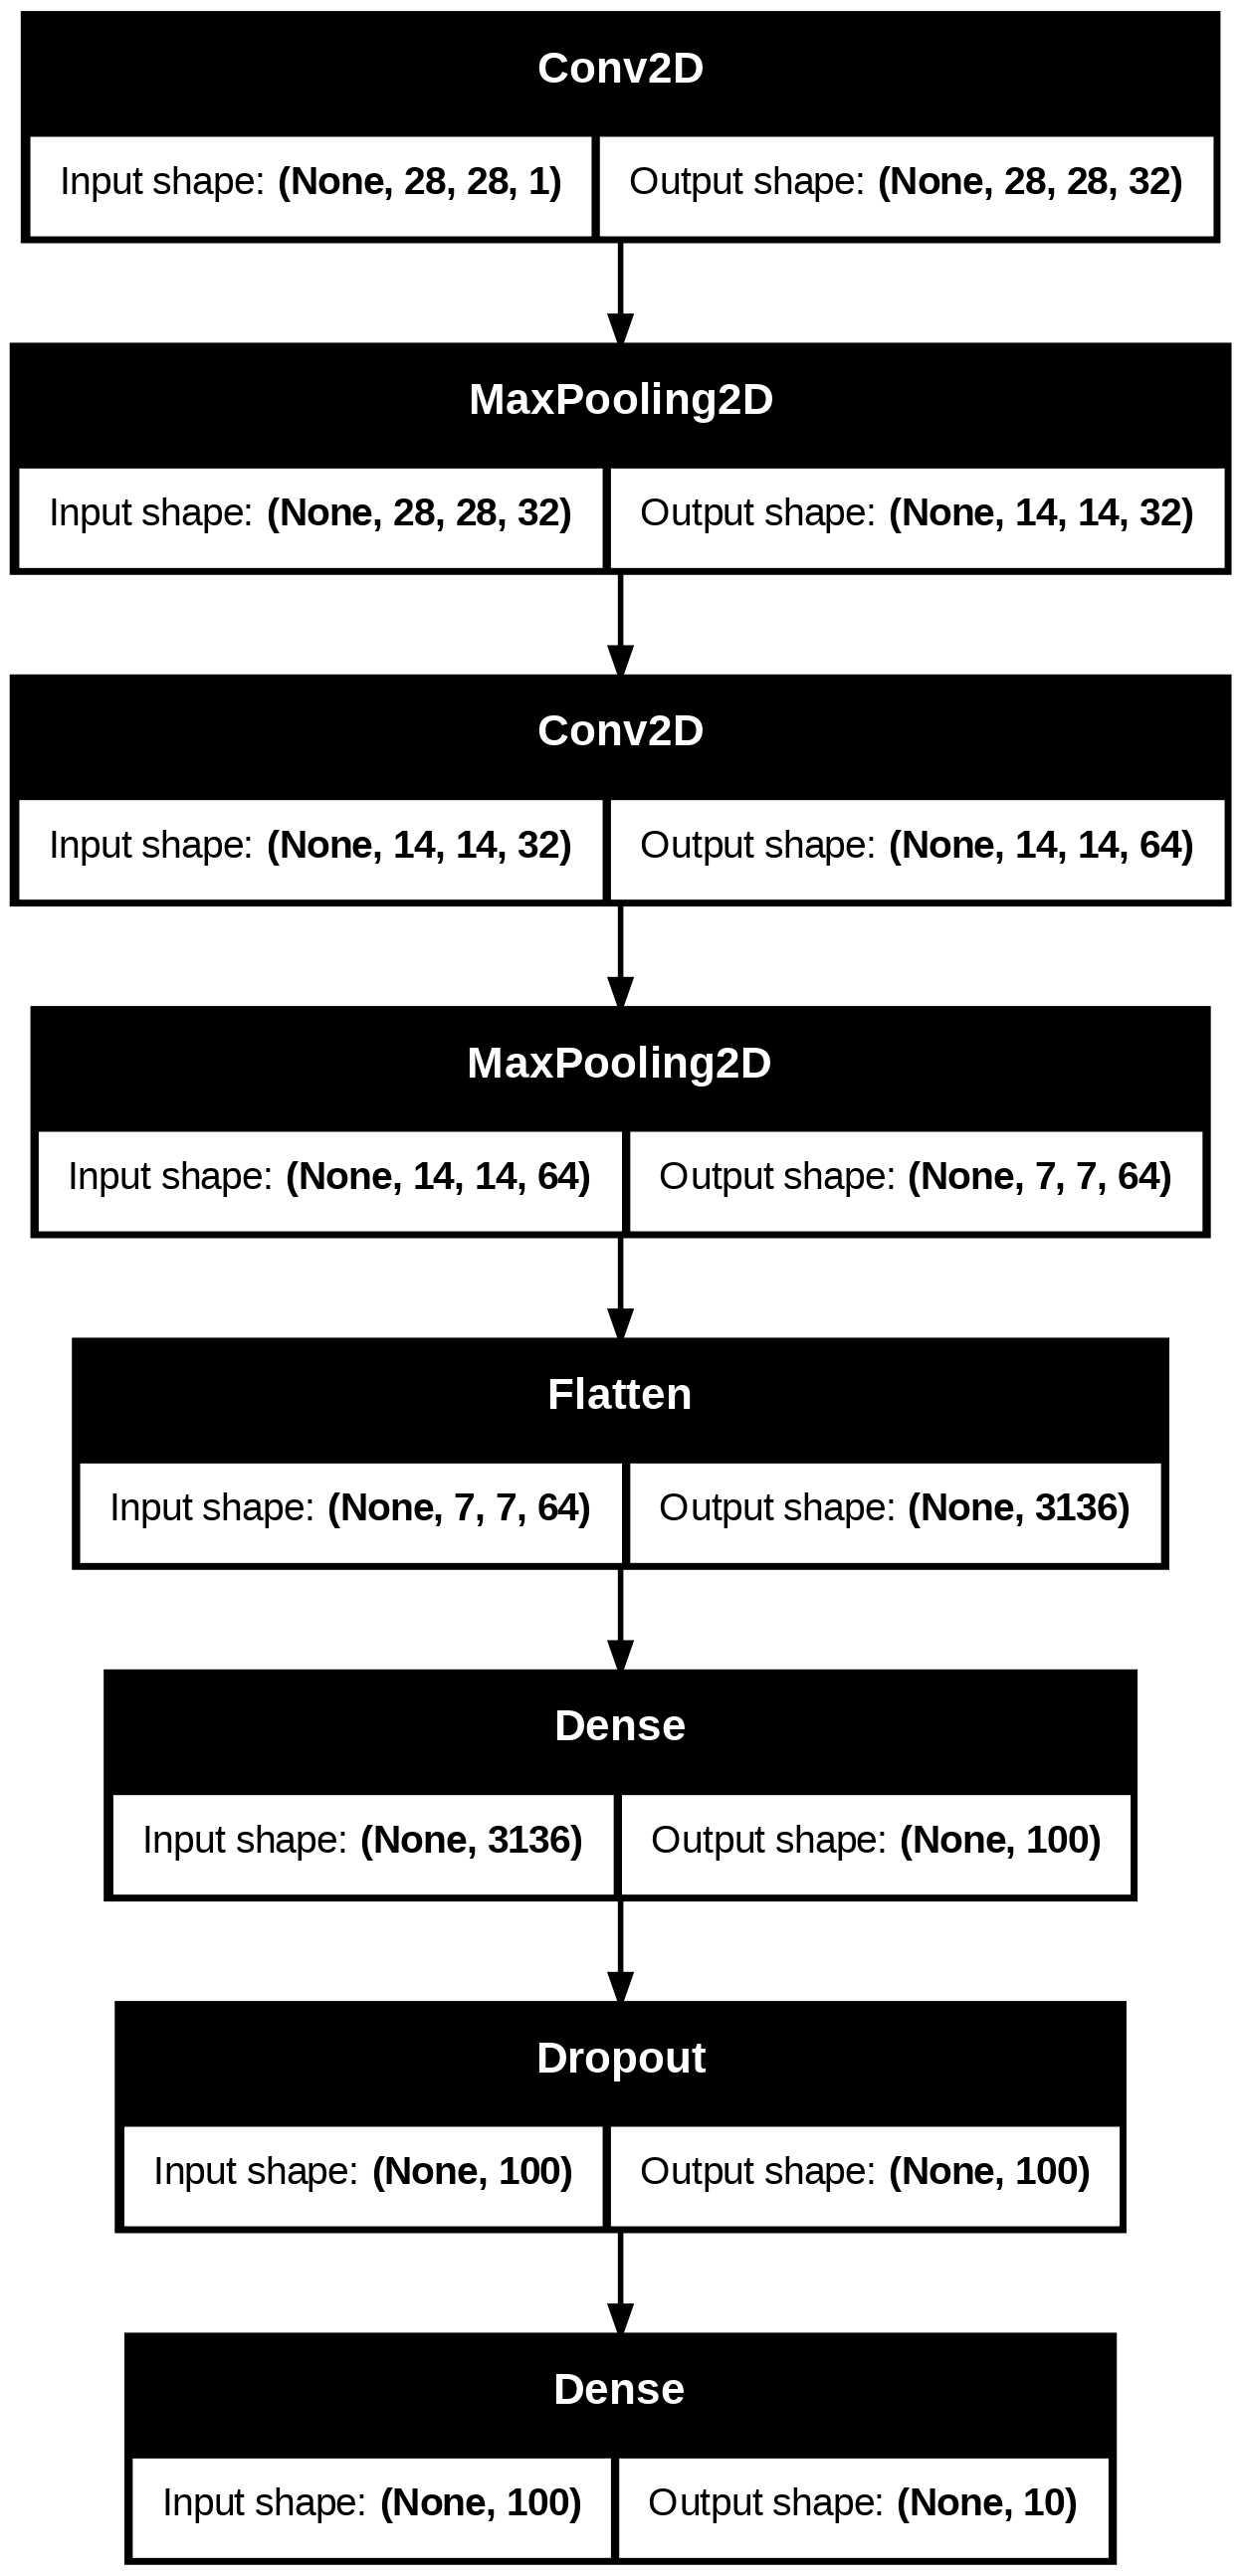

In [3]:
from tensorflow import keras
# 코랩에서 실행하는 경우에는 전에 만든 캐라스 파일을 다운받아 best-cnn-model.keras 파일을 업로드 사용
model = keras.models.load_model('best-cnn-model.keras') # 모델에 캐라스 값을 불러옴
model.layers
# model.layers 리스트에 전에 만들었던 Conv2D, MaxPooling2D층이 번갈아가면서 연속으로 나옴
# Flatten -> Dense -> Dropout -> Dense 출력층
model.summary()
keras.utils.plot_model(model,show_shapes=True) # 입력과 출력 크기를 표시

In [5]:
# 첫번째 합성곱층의 가중치를 알아보자.
# 층의 가중치와 절편은 층의 weights 속성에 있음 (리스트)
conv = model.layers[0] # 첫번째 도장(필터)의 크기(커널)
print(conv.weights[0].shape,conv.weights[1].shape)
#(3, 3, 1, 32) (32,)
# 원소          절편
# 전에 커널 크기를 3*3으로 지정했음, 합성곱층에 전달되는 입력의 깊이 : 1
# 필터 개수가 32개 -> 필터마다 1개의 절편이 있으므로 (32,)가 됨

(3, 3, 1, 32) (32,)


In [6]:
conv2 = model.layers[2] # 2번째 도장(필터)의 크기(커널)
print(conv2.weights[0].shape,conv2.weights[1].shape)
#(3, 3, 32, 64) (64,)

(3, 3, 32, 64) (64,)


In [7]:
# weights 속성은 텐서플로의 다차원배열인 Tensor 클래스의 객체
# 다루기 쉽게 numpy() 메서드를 사용해 넘파일 배열로 변환하자
conv_weights=conv.weights[0].numpy()

# 가중치 배열의 평균(mean)과 표준편차(std)를 numpy() 메서드로 계산한
print(conv_weights.mean(), conv_weights.std())
#-0.022672083 0.24381405
# 평균은 0에 가깝고 편차는 0.24정도
# 드롭아웃때문에 best-cnn-model.keras 에 따라 결과가 다르게 나올 수 있음

-0.022672083 0.24381405


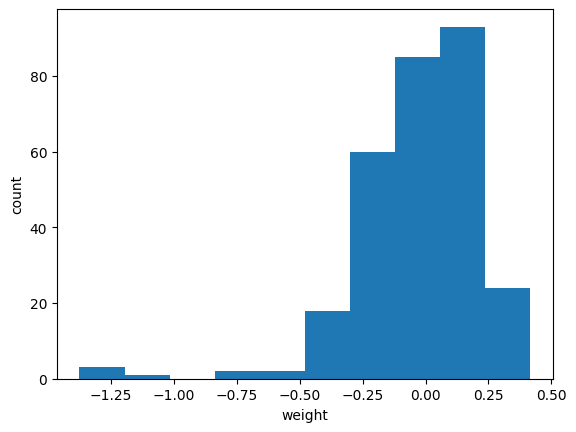

In [8]:
import matplotlib.pyplot as plt
# 해당 가중치가 어떤 분포를 가졌는지 차트화해서 직관적으로 이해해보자!
# hist() 메서드에 1차원 배열을 전달해야함 (히스토그램)
plt.hist(conv_weights.reshape(-1,1))
plt.xlabel('weight')
plt.ylabel('count')
plt.show()
# 0을 중심으로 분포도를 확인할 수 있음

In [9]:
print(conv_weights) # 9개의 리스트, 32개의 값 (9*32)

[[[[ 2.02088803e-01  1.43418983e-01  2.19320849e-01  2.29284391e-01
     1.20841131e-01 -1.61696643e-01  7.59740844e-02 -1.29516209e-02
    -1.84966177e-01 -1.30574688e-01 -3.13999325e-01 -2.37064481e-01
     3.21709886e-02  1.02949496e-02  2.37209365e-01 -1.06831527e+00
     1.49217084e-01  1.28653198e-01 -2.32722625e-01  3.59055810e-02
     4.12201658e-02  1.01128429e-01  9.12226620e-04  2.69055158e-01
     6.95954412e-02  1.08595088e-01  4.20145318e-02 -1.35924041e-01
     5.33467457e-02 -2.50822329e-03 -1.89365476e-01  2.87956763e-02]]

  [[ 3.28123540e-01  3.11297357e-01 -1.33119181e-01 -2.98786551e-01
    -2.34038830e-01 -1.89911216e-01 -3.33777117e-03 -8.77450854e-02
    -4.69493449e-01  2.21667171e-01  7.01824427e-02  1.18317991e-01
     3.62226404e-02  2.34399870e-01 -8.75496715e-02 -8.36041510e-01
    -1.31508067e-01 -1.13000624e-01  1.90599576e-01  7.77340233e-02
     1.88543543e-01  4.48442856e-03  1.67473733e-01  2.63023317e-01
     1.16015606e-01  2.63124973e-01  1.985211

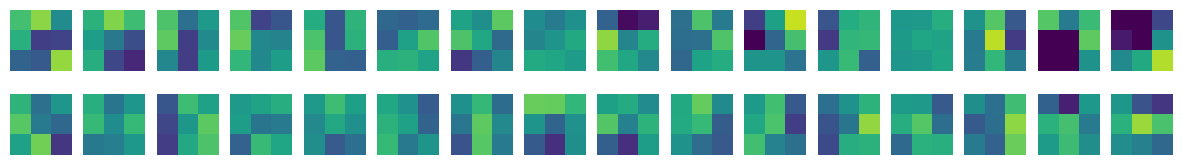

In [12]:
# 32개의 커널을 16개씩 두줄에 출력해보자
fig,axs = plt.subplots(2,16,figsize=(15,2))

# 2*16 = 32개의 그래프 영역을 만들고 순서대로 커널을 출력해봄
for i in range(2):
    for j in range(16):
        axs[i,j].imshow(conv_weights[:,:,0,i*16+j],vmin = -0.5,vmax = 0.5)
        axs[i,j].axis('off')
# 배열의 마지막 차원을 순회하면서 0~16+j 번째까지 가중치 값을 차례대로 출력
plt.show()
# 결과를 보면 이 가중치 값이 무작위로 나열된것이 아니고, 어떤 패턴을 가진 것을 볼 수 있다.
# 예를 들어 첫번째 줄의 맨 왼쪽 가중치는 오른쪽부터 9번째 픽셀의 값이 높음 (밝은 부분이 높음)
# 이 가중치는 오른쪽에 놓인 직선을 만나면 크게 활성화됨
# imshow() 함수는 배열에 있는 최대값과 최소값을 사용해 픽셀의 강도를 표현함
# 즉 0.1이나 0.4나 어떤 값이든 그 배열의 최대값이면 가장 밝은 노란색을 그린다.

# 만약 두 배열을 imshow() 함수로 비교하려면 이런 방법은 좋지 않다.
# 어떤 절대값을 기준으로 픽셀의 강도를 나타내야 비교하기 좋을 것이다.
# 이를 위해서 위 코드에서 vmin,vmax로 matplotlib의 컬러맵(color map)으로 표현할 범위를 지정한다

In [13]:
# 합성곱을 이용한 도장으로는 눈으로 파악하기 힘들어 새로 만들어야함

# 이번에는 훈련하지 않은 빈 합성곱 신경망을 만들어보자
# 이 합성곱층의 가중치가 위에서 본 훈련한 가중치와 어떻게 다른지 그림으로 비교하자
no_training_model = keras.Sequential() # Sequential 클래스 객체를 생성하여 모델에 담음

no_training_model.add(keras.layers.Conv2D(
    32,kernel_size=3,activation='relu',padding='same',input_shape=(28,28,1)
)) # Conv2D층 하나를 추가

no_training_conv = no_training_model.layers[0]
# Conv2D층의 가중치를 저장

print(no_training_conv.weights[0].shape)
# 동일하게 (3,3)커널을 가진 필터를 32개 사용
#(3, 3, 1, 32)

(3, 3, 1, 32)


/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [14]:
# 훈련하지 않은 가중치의 평균과 표준편차를 확인해보자
no_training_weights = no_training_conv.weights[0].numpy() # 넘파이 배열로 만듦

print(no_training_weights.mean(),no_training_weights.std())
# mena()평균 : 0에 가까움, std()표준편차 : 매우 작음

0.0026544556 0.07910345


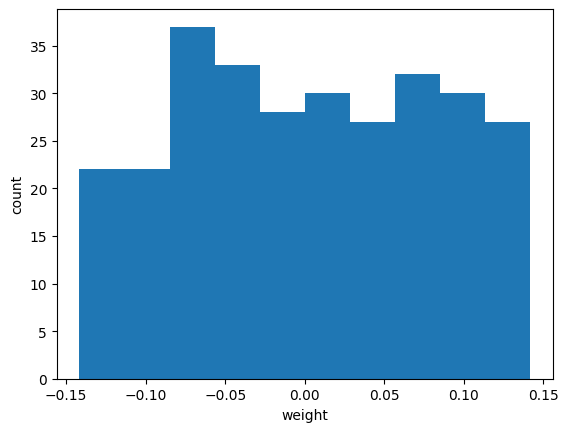

In [15]:
# 해당 가중치 배열을 히스토그램으로 시각화해서 확인해보자.
plt.hist(no_training_weights.reshape(-1,1)) # 1차원 배열로 전달
plt.xlabel('weight')
plt.ylabel('count')
plt.show()
# 가중치가 대부분 -0.15~0.15 사이에 있음
# 비교적 고른 분포를 보임
# -> 텐서플로가 신경망의 가중치를 처음 초기화할 때 균등하게 분포해서 랜덤하게 값을 선택함

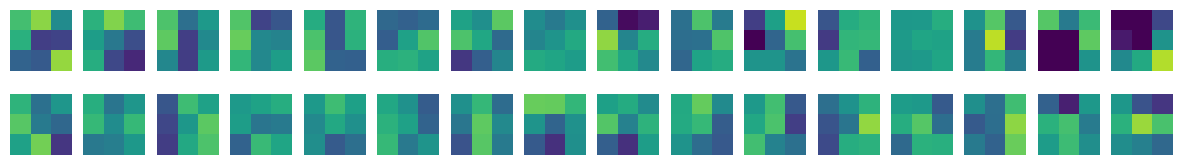

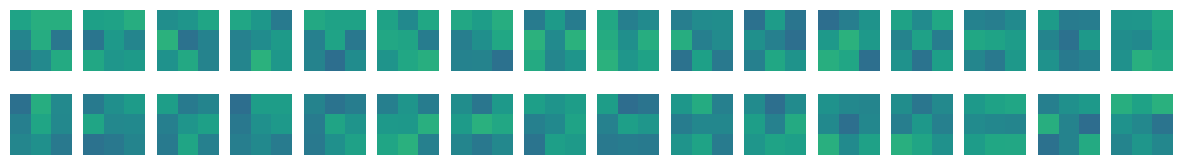

In [16]:
# 훈련하지 않은 가중치 커널 출력?
fig,axs = plt.subplots(2,16,figsize=(15,2))

for i in range(2):
    for j in range(16):
        axs[i, j].imshow(no_training_weights[:,:,0,i*16 + j], vmin=-0.5, vmax=0.5)
        axs[i, j].axis('off')

plt.show()
# 위의 훈련된 이미지와 비교해보면 가중치가 밋밋하게 표현되는 것을 볼 수 있다.
# -> 분류 정확도를 높이기 위해 유용한 패턴을 학습했다는 사실을 알 수 있다.

In [ ]:
# 함수형 API : 케라스의 내장형 함수
# 케라스의 Sequential 클래스는 층을 차례대로 쌓은 모델을 만듦
# 딥러닝에는 좀 더 복잡한 모델이 많이 있다. ( 입력이 2개, 출력이 2개일 수도 있음 )

# 이때 사용하는 것이 함수형 API
# 함수형 API는 케라스의 Model 클래스를 사용하여 모델을 만든다.

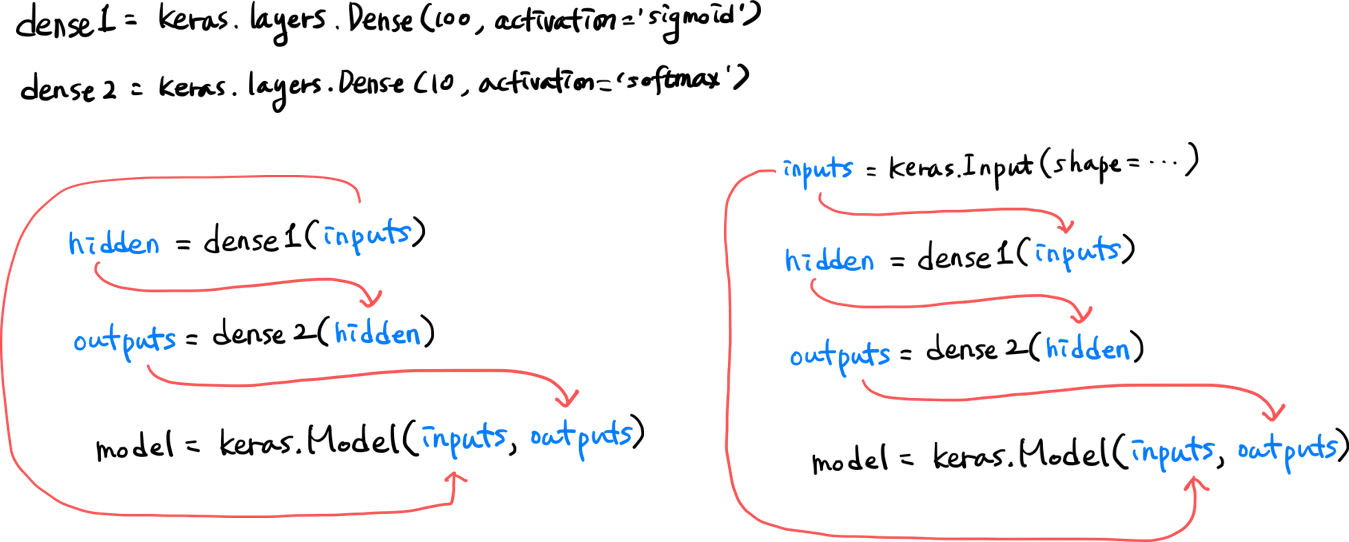

In [ ]:
# Dense 총 2개로 이루어진 완전연결신경망을 함수형 API로 구현한 것
# 2개의 Dense층 객체 만듦 keras.Model() 안쪽 파라미터로 제공
# 입력에서 출력까지 층을 호출한 결과를 계속 이어주고 Model 클래스에 입력과 최종 출력을 지정함
# 여기 나온 input=keras.input()은 plot_model() 함수로 모델의 층을 도식화 했을 때
# inputLayer 클래스가 처음 나온 것으로
# Sequential 클래스는 inputLayer 클래스를 자동으로 추가하고 호출해줌

# Model 클래스에서는 우리가 수동으로 inputLayer 클래스를 만들어서 호출해야함

# 전체를 합쳐보면 오른쪽 위 그림처럼 체인으로 동착함
# 입력에서 출력까지 연결하고 마지막에 Model 클래스에 입력과 출력을 지정하여 모델을 만듦
# 이렇게 모델을 만들게 되면 중간에 다양한 형태의 층을 연결할 수 있음
# inputs = keras.input(shape(784,))

# dense1 = keras.layers.Dense(100,activation='sigmoid') # relu
# dense2 = keras.layers.Dense(10, activation='softmax')

# hidden = dense1(inputs)
# outputs = dense2(hidden)

# model = keras.Model(inputs,outputs)

In [ ]:
# 함수형 API가 필요한 이유
# model 객체의 층을 순서대로 나열한 아래 사진 참고

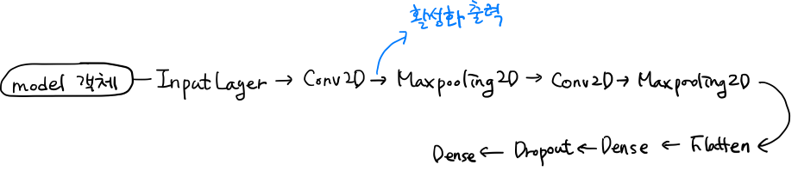

In [ ]:
# 우리가 2개 이상의 입력이 필요한 부분 : 첫번째 conv2D의 출력 부분
# model 객체의 입력과 Conv2D의 출력을 알 수 있다면 이 둘을 연결하여 새로운 모델을 얻을 수 있다
# conv_acti = keras.Model(model.input,model.layers[0].output)

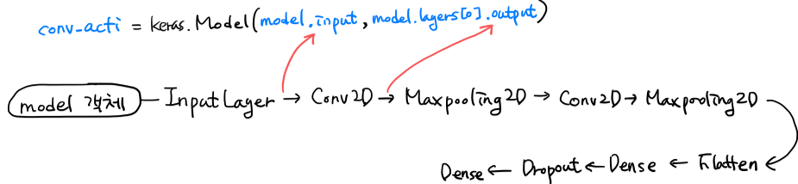

In [17]:
# model 객체에 predict() 메서드를 호출하면 마지막 층까지 모든 계산을 수행한 후 최종 출력을 반환한다.

# 하지만 우리가 필요한 것은 첫번째 Conv2D층이 출력한 특성맵이다.
# 첫번째 층의 출력은 Conv2D 객체의 output 속성에서 얻을 수 있다.
# -> model.layer[0].output으로 얻을 수 있다.
#          Conv2D객체
# 입력은 model.input으로 얻을 수 있다.
print(model.inputs)

[<KerasTensor shape=(None, 28, 28, 1), dtype=float32, sparse=False, ragged=False, name=input_layer_1>]


In [20]:
# 이제 model.input과 model.layers[0].output을 연결하는 새로운 conv_acti 모델을 만들 수 있다!
# (중간값의 input,output을 얻었으므로)

conv_acti = keras.Model(model.inputs,model.layers[0].output)

# model 객체에 predict() 메서드를 호출하면 최종 출력층의 확률을 반환함
# -> model.predict(val_scaled[0:1])

# 하지만 conv_acti에 predict() 메서드를 호출하면 첫번째 Conv2D의 출력을 반환
# -> conv_acti.predict(inputs)

In [21]:
# 특성맵 시각화
# 케라스로 패션 MNIST 데이터셋을 읽은 후 훈련세트에 있는 첫번째 샘플을 그려봄
(train_input,train_target),(test_input,test_target) = keras.datasets.fashion_mnist.load_data()

29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


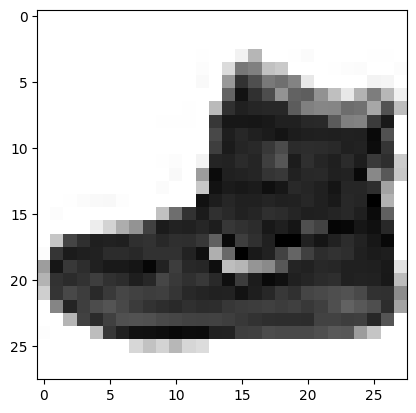

In [22]:
# 첫번째 샘플 출력
plt.imshow(train_input[0],cmap='gray_r')
plt.show() # 앵클부츠

In [23]:
# 이 샘플을 conv_acti 모델에 주입하여 Conv2D층이 만드는 특성 맵을 출력해보자
# predict() 메서드는 항상 입력의 첫번째 차원이 배치차원일 것으로 기대한다.
# 하나의 샘플을 전달하더라도 꼭 첫번째 차원을 유지해야함
# 이를 위해서 슬라이싱 연산자를 사용해 첫번째 샘플을 선택한다.
# 그 다음 (784,) 크기를 (28,28,1)로 변경하고 255.0으로 나눔 (전처리과정 동일)
inputs = train_input[0:1].reshape(-1,28,28,1)/255.0

# 특성맵의 출력 생성
feature_maps = conv_acti.predict(inputs)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 360ms/step


In [24]:
# maps의 크기를 확인
print(feature_maps.shape)
# (1, 28, 28, 32) 1장의 이미지, 28*28크기, 특성 도장 32개

(1, 28, 28, 32)


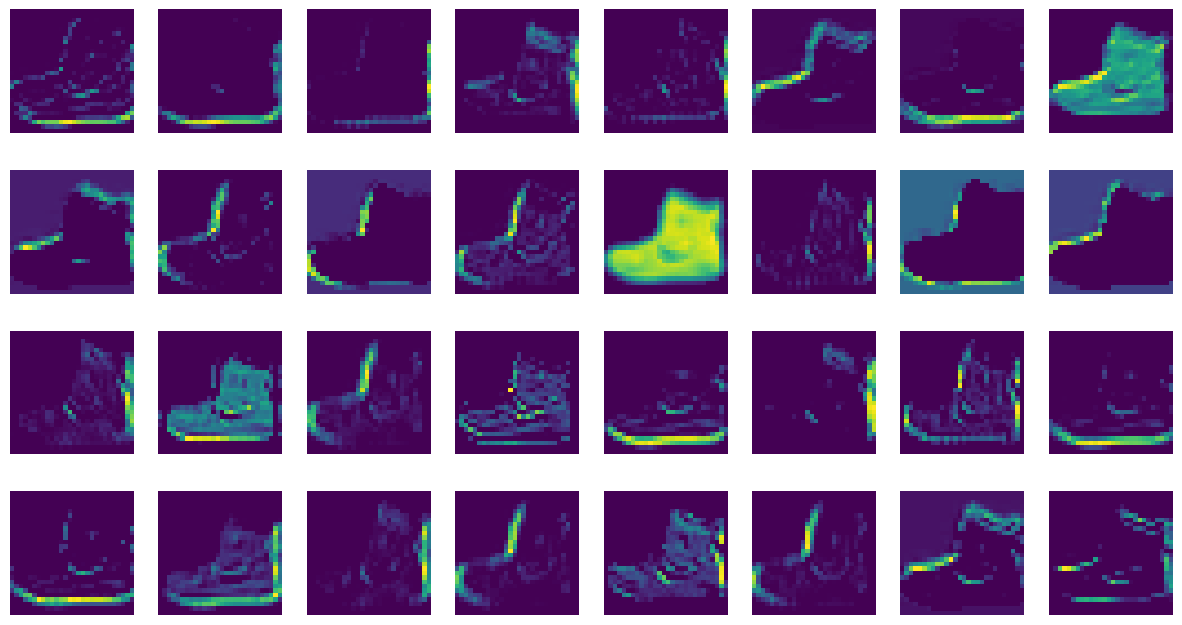

In [26]:
# 세임 패딩과 32개의 필터를 사용한 합성곱층의 출력이므로 (28,28,43)
# 첫번째 차원은 배치차원! (필 쑤)
# 샘플을 하나 입력했기 때문에 1이됨

# matplotlib imshow() 함수로 특성맵을 그려보자!
# 총 32개의 특성맵이 있으므로 4행으로 나누어 출력
fig,axs = plt.subplots(4,8,figsize=(15,8))

for i in range(4):
    for j in range(8):
        axs[i,j].imshow(feature_maps[0,:,:,i*8+j])
        axs[i,j].axis('off')
plt.show()

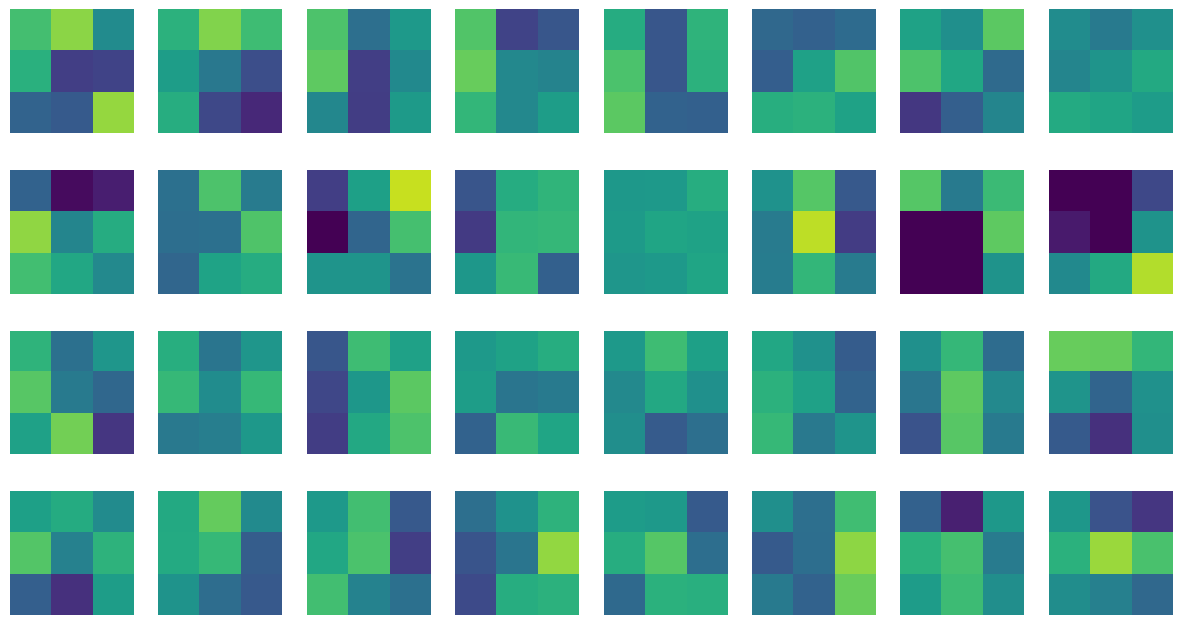

In [27]:
# 필터의 가중치를 출력한 그림과 특성맵을 1:1 비교해보자!
fig,axs = plt.subplots(4,8,figsize=(15,8))
for i in range(4):
    for j in range(8):
        axs[i,j].imshow(conv_weights[:,:,0,i*8+j], vmin=-0.5,vmax=0.5)
        axs[i,j].axis('off')
plt.show() # 3*3 도장에 대한 가중치값 시각화

In [28]:
# 두번째 합성곱층이 만든 특성맵도 같은 방식으로 확인할 수 있다.
# (3,3,32,62)(64,)

# 먼저 model 객체의 입력과 두번째 합성곱층인
# model.layers[2]의 출력을 연결한 conv2_acti 모델을 만들다
conv2_acti = keras.Model(model.inputs,model.layers[2].output)

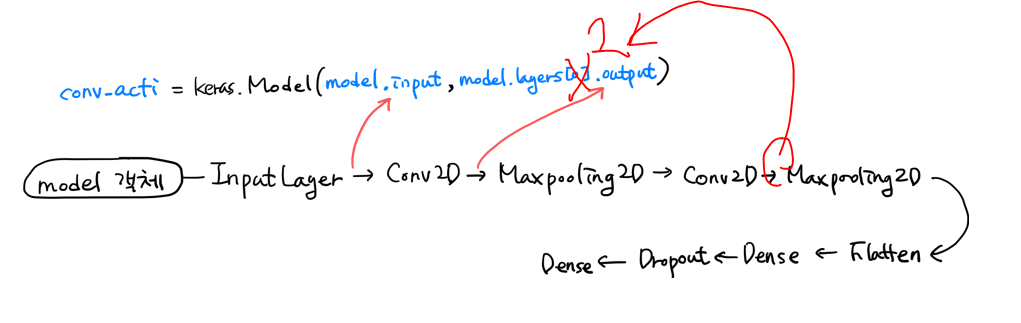

In [31]:
# 첫번째 샘플을 conv2_acti 모델의 predict() 메서드에 전달
feature_maps = conv2_acti.predict(train_input[0:1].reshape(-1, 28, 28, 1)/255.0)
# 첫번째 풀링에서 가로세로 크기가 절반으로 줄었고,
# 두번째 합성곱층의 필터개수는 64개 이므로
# feature_maps의 크기는 배치 차원을 제외하면 (14,14,64)

print(feature_maps.shape)
# (1, 14, 14, 64)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 276ms/step
(1, 14, 14, 64)


In [33]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_3 (Conv2D)               │ (None, 28, 28, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 14, 14, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 14, 14, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 7, 7, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 3136)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 100)            │       313,700 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 100)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │         1,010 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,000,580 (3.82 MB)

 Trainable params: 333,526 (1.27 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 667,054 (2.54 MB)

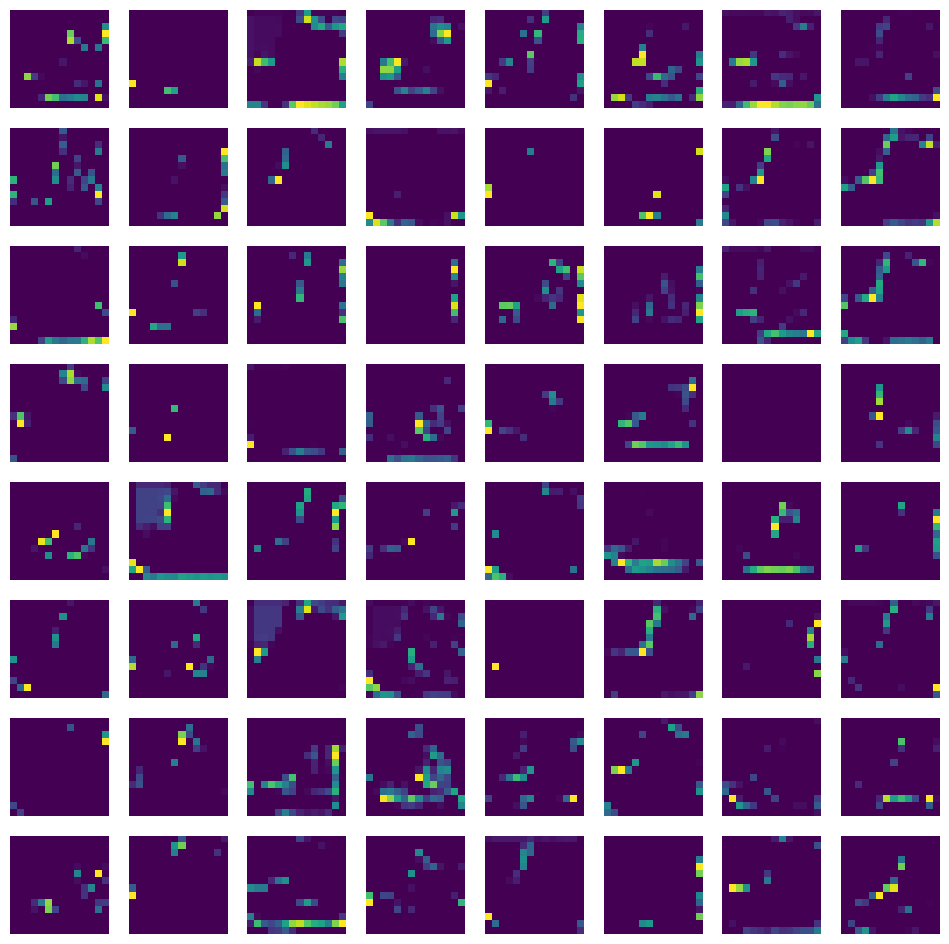

In [34]:
# 64개의 특성맵을 8개씩 나누어 그려보자
fig,axs = plt.subplots(8,8,figsize=(12,12))

for i in range(8):
    for j in range(8):
        axs[i, j].imshow(feature_maps[0,:,:,i*8 + j])
        axs[i, j].axis('off')

plt.show()

In [ ]:
# 이 특성맵은 시각적으로 이해하기가 힘들다!
# 두번째 합성곱 층의 필터 크기 : (3,3,32)
# 두번째 합성곱 층의 첫번째 필터가 앞서 출력한 32개의 특성맵과 곱해짐

# 두번째 합성곱층의 첫번째 특성맵이 됨
# 이렇게 계산된 출력은 (14,14,32) 특성맵에서 어떤 부위를 감지하는지 직관적으로 이해가 힘들지만

# 합성곱 신경망의 앞부분에 있는 합성곱층은 이미지의 시각적인 정보를 감지함
# 뒷부분은 앞쪽에서 감지한 시각적인 정보를 바탕으로 추상적인 정보를 학습한다고 보면 된다.

# 10개의 클래스를 찾을 수 있는 이유

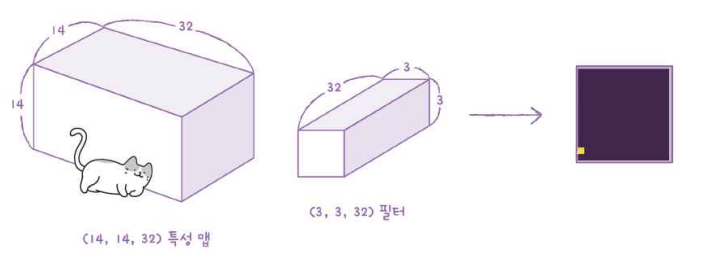